Taken from [keras/example](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using Theano backend.


In [2]:
batch_size = 128 # Number of samples to send in one epoch
num_classes = 10
epochs = 5 # Number of passes over the training data

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # at ~/.keras/datasets

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [19]:
print (x_train.shape)

(60000, 784)


In [6]:
vis = x_train[10]
vis = vis.reshape(28, 28)

In [7]:
import matplotlib.pyplot as plt
plt.imshow(vis, cmap=plt.get_cmap('gray'))

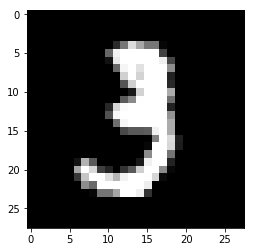

In [8]:
plt.show()

In [9]:
print (y_train[10])

3


In [20]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print (y_train[10])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [21]:
print (len(x_train), len(y_train))

60000 60000


In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
len(x_train)

60000

In [22]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s - loss: 0.2424 - acc: 0.9250 - val_loss: 0.1119 - val_acc: 0.9667
Epoch 2/5
60000/60000 [==============================] - 18s - loss: 0.0892 - acc: 0.9728 - val_loss: 0.1196 - val_acc: 0.9644
Epoch 3/5
60000/60000 [==============================] - 18s - loss: 0.0627 - acc: 0.9812 - val_loss: 0.0743 - val_acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 20s - loss: 0.0455 - acc: 0.9863 - val_loss: 0.0740 - val_acc: 0.9800
Epoch 5/5
60000/60000 [==============================] - 19s - loss: 0.0371 - acc: 0.9889 - val_loss: 0.1059 - val_acc: 0.9766


In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.105923188951
Test accuracy: 0.9766


In [24]:
model = Sequential()
model.add(Dense(512, activation='softmax', input_shape=(784,)))
model.add(Dense(256, activation='softmax'))
model.add(Dense(512, activation='softmax'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,962
Trainable params: 669,962
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s - loss: 2.3015 - acc: 0.1117 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 20s - loss: 2.2985 - acc: 0.1124 - val_loss: 2.2862 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 21s - loss: 2.2124 - acc: 0.1810 - val_loss: 2.1012 - val_acc: 0.2094
Epoch 4/5
60000/60000 [==============================] - 20s - loss: 1.9808 - acc: 0.2077 - val_loss: 1.8809 - val_acc: 0.2082
Epoch 5/5
60000/60000 [==============================] - 20s - loss: 1.8235 - acc: 0.2070 - val_loss: 1.7853 - val_acc: 0.2094


In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.80054370155
Test accuracy: 0.2095
